# Challenge 02 Uso de API DENUE

## Actividad 1

Utilizando la API de DENUE, extraer datos de su estado y visualizar el top 10 de clases de actividades económicas.

Se requiere un token para el URL del llamado de la api siguiendo la siguiente sintaxis de acuerdo al método BuscarEntidad:

https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/restaurantes/14/1/10/[Aquí va tu token]

Mi token es 5ccc867c-8839-08e7-e169-bada9af163a9

In [60]:
import requests
import pandas as pd
import json

# URL del endpoint del API del INEGI para actividades económicas
url = "https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/09/1/50000/5ccc867c-8839-08e7-e169-bada9af163a9"

# Realizar la solicitud GET al API
response = requests.get(url)

# Comprobar si la solicitud fue exitosa (código de respuesta 200)
if response.status_code == 200:
    content= json.loads(response.content)
    
    data = pd.DataFrame(content)

else:
    print("La solicitud al API del INEGI falló.")

content

[{'CLEE': '09014467112002181000007121S7',
  'Id': '8331533',
  'Nombre': ' AZULEMEX DIVISION',
  'Razon_social': 'AZULEJOS TADIK SA DE CV',
  'Clase_actividad': 'Comercio al por menor de pisos y recubrimientos cerámicos',
  'Estrato': '6 a 10 personas',
  'Tipo_vialidad': 'AVENIDA',
  'Calle': 'División del Norte',
  'Num_Exterior': '2131',
  'Num_Interior': '0',
  'Colonia': 'SANTA CRUZ ATOYAC',
  'CP': '03310',
  'Ubicacion': 'BENITO JUÁREZ, Benito Juárez, CIUDAD DE MÉXICO',
  'Telefono': '',
  'Correo_e': 'DIVISION@AZULEMEX.COM',
  'Sitio_internet': '',
  'Tipo': 'Fijo',
  'Longitud': '-99.15517456',
  'Latitud': '19.36431050',
  'tipo_corredor_industrial': '',
  'nom_corredor_industrial': '',
  'numero_local': ''},
 {'CLEE': '09014433430000055111038498M2',
  'Id': '6776515',
  'Nombre': ' EL ECONOMISTA GRUPO EDITORIAL',
  'Razon_social': 'EL ECONOMISTA GRUPO EDITORIAL SA DE CV',
  'Clase_actividad': 'Edición de periódicos',
  'Estrato': '251 y más personas',
  'Tipo_vialidad': 'AVE

Se muestra el json obtenido de la API del registro 1 al 50000 el cual con pandas pasamos a un data frame que se muestra a continuación.

In [61]:
data.head()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
0,09014467112002181000007121S7,8331533,AZULEMEX DIVISION,AZULEJOS TADIK SA DE CV,Comercio al por menor de pisos y recubrimiento...,6 a 10 personas,AVENIDA,División del Norte,2131,0,...,"BENITO JUÁREZ, Benito Juárez, CIUDAD DE MÉXICO",,DIVISION@AZULEMEX.COM,,Fijo,-99.15517456,19.36431050,,,
1,09014433430000055111038498M2,6776515,EL ECONOMISTA GRUPO EDITORIAL,EL ECONOMISTA GRUPO EDITORIAL SA DE CV,Edición de periódicos,251 y más personas,AVENIDA,SAN JERÓNIMO,458,0,...,"ÁLVARO OBREGÓN, Álvaro Obregón, CIUDAD DE MÉXICO",,GABRIELA.LARA@ELECONOMISTA.MX,ELECONOMISTA.COM.MX,Fijo,-99.20411647,19.33269938,EDIFICIO COMERCIAL Y DE SERVICIOS,JARDINES DEL PEDREGAL,
2,09005722513011503000037878S9,8332182,LA CASA DE TOÑO,GRUPO RESTAURANTERO GR2 SA DE CV,Restaurantes con servicio de preparación de an...,11 a 30 personas,AVENIDA,GUILLERMO MASSIEU HELGUERA,86,,...,"GUSTAVO A. MADERO, Gustavo A. Madero, CIUDAD D...",,LETICIA.DIAZ@LACASADETONO.COM.MX,,Fijo,-99.13758140,19.51048242,,,
3,09002722513004564000037878S7,8332181,LA CASA DE TOÑO,GRUPO RESTAURANTERO GR2 SA DE CV,Restaurantes con servicio de preparación de an...,31 a 50 personas,CALLE,FLORESTA,77,,...,"AZCAPOTZALCO, Azcapotzalco, CIUDAD DE MÉXICO",,LETICIA.DIAZ@LACASADETONO.COM.MX,,Fijo,-99.18657203,19.46603565,,,
4,09016722513004264000037877S4,8332611,LA CASA DE TOÑO,GASTRONOMICA LCDBC SA DE CV,Restaurantes con servicio de preparación de an...,31 a 50 personas,AVENIDA,RODOLFO GAONA,3,201,...,"MIGUEL HIDALGO, Miguel Hidalgo, CIUDAD DE MÉXICO",,,,Fijo,-99.21870029,19.45217271,,,


La columna "Ubicación" se separa en 3 columnas: Localidad, municipio, estado

In [62]:
data[['Localidad', 'Municipio', 'Estado']] = data['Ubicacion'].str.split(', ', expand=True)

#Eliminamos la columna ubicación

data.drop(columns=['Ubicacion'], inplace=True)

data.head()


,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,Localidad,Municipio,Estado
0,09014467112002181000007121S7,8331533,AZULEMEX DIVISION,AZULEJOS TADIK SA DE CV,Comercio al por menor de pisos y recubrimiento...,6 a 10 personas,AVENIDA,División del Norte,2131,0,...,,Fijo,-99.15517456,19.36431050,,,,BENITO JUÁREZ,Benito Juárez,CIUDAD DE MÉXICO
1,09014433430000055111038498M2,6776515,EL ECONOMISTA GRUPO EDITORIAL,EL ECONOMISTA GRUPO EDITORIAL SA DE CV,Edición de periódicos,251 y más personas,AVENIDA,SAN JERÓNIMO,458,0,...,ELECONOMISTA.COM.MX,Fijo,-99.20411647,19.33269938,EDIFICIO COMERCIAL Y DE SERVICIOS,JARDINES DEL PEDREGAL,,ÁLVARO OBREGÓN,Álvaro Obregón,CIUDAD DE MÉXICO
2,09005722513011503000037878S9,8332182,LA CASA DE TOÑO,GRUPO RESTAURANTERO GR2 SA DE CV,Restaurantes con servicio de preparación de an...,11 a 30 personas,AVENIDA,GUILLERMO MASSIEU HELGUERA,86,,...,,Fijo,-99.13758140,19.51048242,,,,GUSTAVO A. MADERO,Gustavo A. Madero,CIUDAD DE MÉXICO
3,09002722513004564000037878S7,8332181,LA CASA DE TOÑO,GRUPO RESTAURANTERO GR2 SA DE CV,Restaurantes con servicio de preparación de an...,31 a 50 personas,CALLE,FLORESTA,77,,...,,Fijo,-99.18657203,19.46603565,,,,AZCAPOTZALCO,Azcapotzalco,CIUDAD DE MÉXICO
4,09016722513004264000037877S4,8332611,LA CASA DE TOÑO,GASTRONOMICA LCDBC SA DE CV,Restaurantes con servicio de preparación de an...,31 a 50 personas,AVENIDA,RODOLFO GAONA,3,201,...,,Fijo,-99.21870029,19.45217271,,,,MIGUEL HIDALGO,Miguel Hidalgo,CIUDAD DE MÉXICO


Teniendo los datos se procede a realizar un bar chart con el top 10 de actividades económicas usando Seaborn

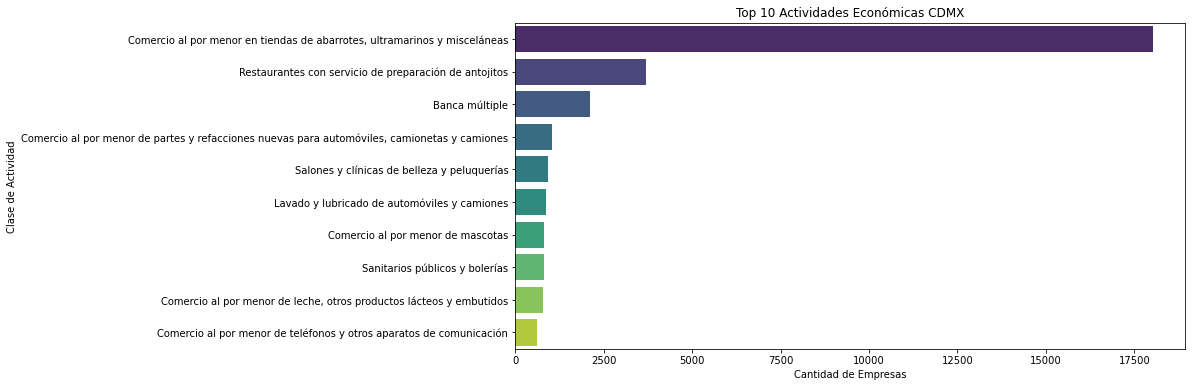

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_clases = data['Clase_actividad'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_clases.values, y=top_10_clases.index, palette='viridis')
plt.title('Top 10 Actividades Económicas CDMX')
plt.xlabel('Cantidad de Empresas')
plt.ylabel('Clase de Actividad')
plt.show()

## Actividad 2

Seleccionar dos entidades y hacer comparativas sobre la clase de actividad económica

In [115]:
# URL del endpoint del API del INEGI para actividades económicas
url_gto = "https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/11/1/20000/5ccc867c-8839-08e7-e169-bada9af163a9"
url_sin = "https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/25/1/20000/5ccc867c-8839-08e7-e169-bada9af163a9"

# Realizar la solicitud GET al API
response_gto = requests.get(url_gto)
response_sin = requests.get(url_sin)

# Comprobar si la solicitud fue exitosa (código de respuesta 200)
if response_gto.status_code == 200:
    content_gto= json.loads(response_gto.text)
    
    data_gto = pd.DataFrame(content_gto)

else:
    print("La solicitud al API del INEGI falló.")

if response_sin.status_code == 200:
    content_sin= json.loads(response_sin.text)
    
    data_sin = pd.DataFrame(content_sin)

else:
    print("La solicitud al API del INEGI falló.")


In [116]:
print(data_gto.info())
print(data_sin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLEE                      20000 non-null  object
 1   Id                        20000 non-null  object
 2   Nombre                    20000 non-null  object
 3   Razon_social              20000 non-null  object
 4   Clase_actividad           20000 non-null  object
 5   Estrato                   20000 non-null  object
 6   Tipo_vialidad             20000 non-null  object
 7   Calle                     20000 non-null  object
 8   Num_Exterior              20000 non-null  object
 9   Num_Interior              20000 non-null  object
 10  Colonia                   20000 non-null  object
 11  CP                        20000 non-null  object
 12  Ubicacion                 20000 non-null  object
 13  Telefono                  20000 non-null  object
 14  Correo_e              

Separamos las columnas de ubicación como lo hicimos en la actividad anterior

In [117]:
data_gto[['Localidad', 'Municipio', 'Estado']] = data_gto['Ubicacion'].str.split(', ', expand=True)


#Eliminamos la columna ubicación

data_gto.drop(columns=['Ubicacion'], inplace=True)


In [118]:
data_sin[['Localidad', 'Municipio', 'Estado']] = data_sin['Ubicacion'].str.split(', ', expand=True)


#Eliminamos la columna ubicación

data_sin.drop(columns=['Ubicacion'], inplace=True)

In [119]:
print(data_gto.info())
print(data_sin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLEE                      20000 non-null  object
 1   Id                        20000 non-null  object
 2   Nombre                    20000 non-null  object
 3   Razon_social              20000 non-null  object
 4   Clase_actividad           20000 non-null  object
 5   Estrato                   20000 non-null  object
 6   Tipo_vialidad             20000 non-null  object
 7   Calle                     20000 non-null  object
 8   Num_Exterior              20000 non-null  object
 9   Num_Interior              20000 non-null  object
 10  Colonia                   20000 non-null  object
 11  CP                        20000 non-null  object
 12  Telefono                  20000 non-null  object
 13  Correo_e                  20000 non-null  object
 14  Sitio_internet        

Se unen los dataframes en uno solo

In [120]:
data = pd.concat([data_gto, data_sin], axis=0)

In [121]:
print(data)

                               CLEE       Id                         Nombre  \
0      11037464111001051000037386S5  8620894         FARMACIAS DE SIMILARES   
1      11017462111000147000003517S6  6330332                MEGA IRAPUATO     
2      11017484129000194001000000U4  6156451                            SA"   
3      11042237312000015011000000U1  6145583                              "   
4      11020316211020465001000000U8  6261391  """EXCLUSIVAS ENRICO FERRI"""   
...                             ...      ...                            ...   
19995  25012722515001121000000000M3  3831952                   CAFE EL FARO   
19996  25012722515002141000000000U0  8189090       CAFE EL FARO DE MAZATLAN   
19997  25012311923000016000000000U9  6387888                 CAFÉ EL MARINO   
19998  25006431199000062001010691S7  6387280        CAFÉ EL MARINO CULIACÁN   
19999  25001431199000021001010691S4  6387451      CAFE EL MARINO LOS MOCHIS   

                              Razon_social  \
0    

Habiendo unido los dataframes en uno solo, se puede hacer la gráfica que permita comparar ambos estados

In [122]:
data.columns.values

array(['CLEE', 'Id', 'Nombre', 'Razon_social', 'Clase_actividad',
       'Estrato', 'Tipo_vialidad', 'Calle', 'Num_Exterior',
       'Num_Interior', 'Colonia', 'CP', 'Telefono', 'Correo_e',
       'Sitio_internet', 'Tipo', 'Longitud', 'Latitud',
       'tipo_corredor_industrial', 'nom_corredor_industrial',
       'numero_local', 'Localidad', 'Municipio', 'Estado'], dtype=object)

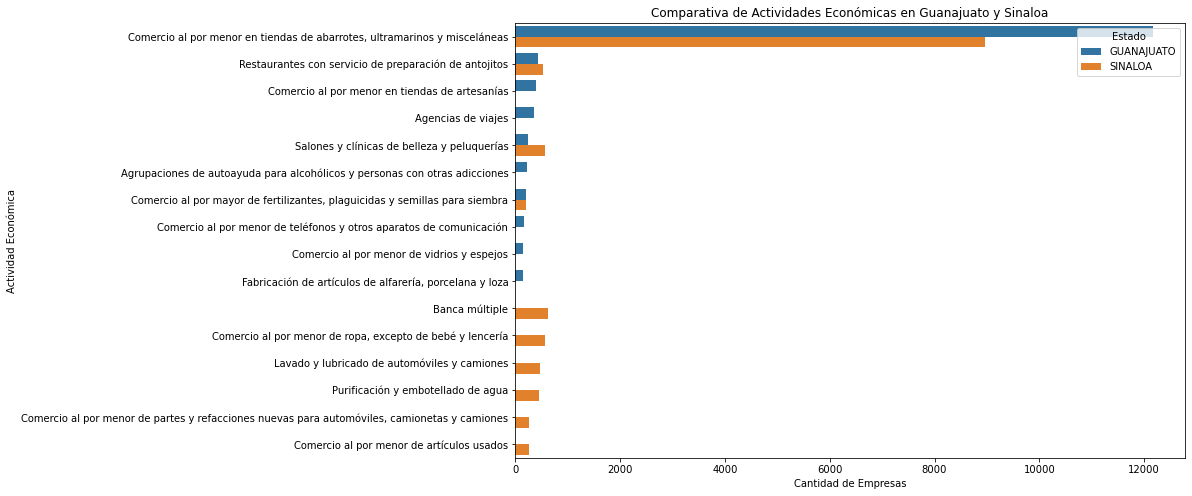

In [126]:
# Filtra los datos para seleccionar solo los dos estados de interés (por ejemplo, EstadoA y EstadoB)
estados_seleccionados = ['GUANAJUATO', 'SINALOA']
df_seleccionado = data[data['Estado'].isin(estados_seleccionados)]

# Agrupa los datos por actividad económica y estado, cuenta la cantidad de ocurrencias y ordena de mayor a menor
top_actividades = df_seleccionado.groupby(['Clase_actividad', 'Estado'])['Id'].count().reset_index()
top_actividades = top_actividades.sort_values(by='Id', ascending=False)

# Filtra solo las 10 principales actividades económicas para cada estado
top_actividades_estadoA = top_actividades[top_actividades['Estado'] == 'GUANAJUATO'].head(10)
top_actividades_estadoB = top_actividades[top_actividades['Estado'] == 'SINALOA'].head(10)

# Combina los datos de los dos estados en un solo DataFrame para el gráfico
top_actividades_combined = pd.concat([top_actividades_estadoA, top_actividades_estadoB])

# Crea un gráfico de barras comparativo
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico según tus necesidades
sns.barplot(x='Id', y='Clase_actividad', hue='Estado', data=top_actividades_combined)
plt.xlabel('Cantidad de Empresas')
plt.ylabel('Actividad Económica')
plt.title('Comparativa de Actividades Económicas en Guanajuato y Sinaloa')
plt.legend(title='Estado')
plt.show()

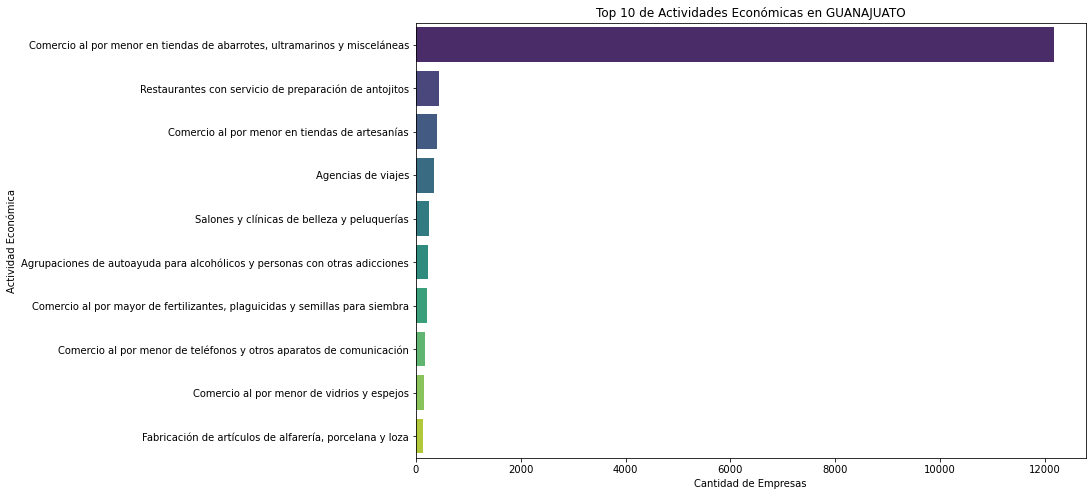

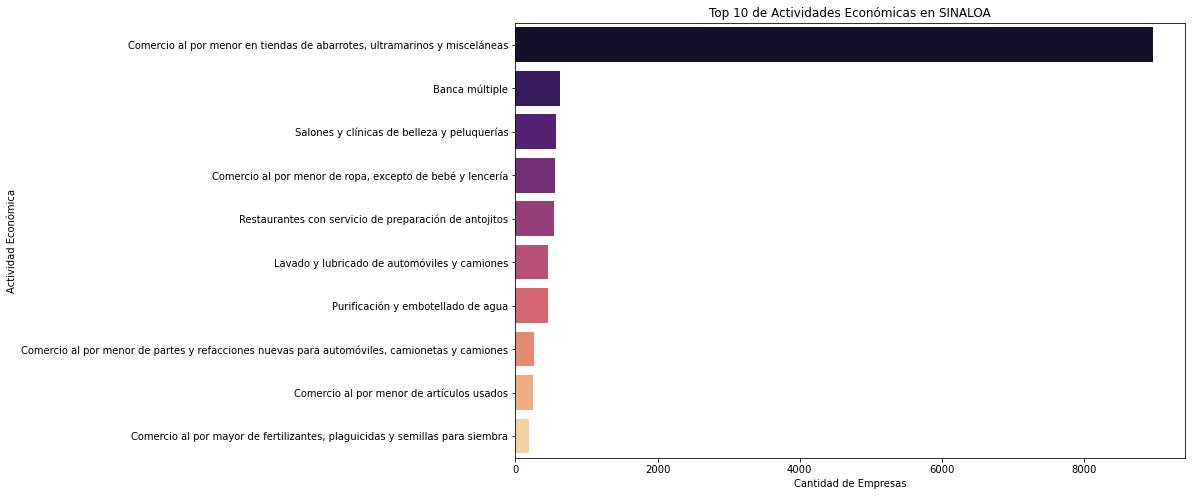

In [127]:
# Nombre de los estados que deseas comparar
estado1 = 'GUANAJUATO'
estado2 = 'SINALOA'

# Filtra los datos para seleccionar solo el primer estado y encuentra su top 10
top_estado1 = data[data['Estado'] == estado1]['Clase_actividad'].value_counts().nlargest(10)

# Filtra los datos para seleccionar solo el segundo estado y encuentra su top 10
top_estado2 = data[data['Estado'] == estado2]['Clase_actividad'].value_counts().nlargest(10)

# Crea un gráfico de barras para el primer estado
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico según tus necesidades
sns.barplot(x=top_estado1.values, y=top_estado1.index, palette='viridis')
plt.xlabel('Cantidad de Empresas')
plt.ylabel('Actividad Económica')
plt.title(f'Top 10 de Actividades Económicas en {estado1}')
plt.show()

# Crea un gráfico de barras para el segundo estado
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico según tus necesidades
sns.barplot(x=top_estado2.values, y=top_estado2.index, palette='magma')
plt.xlabel('Cantidad de Empresas')
plt.ylabel('Actividad Económica')
plt.title(f'Top 10 de Actividades Económicas en {estado2}')
plt.show()
